# {Project Title}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

How does air quality affect human health? 

This is for general awareness about the dangers of pollution. Also, if patterns between specific air quality metrics and health impacts can be found, then a combination of public policy and medical interventions could address those health impacts.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

How do metrics of air quality correlate with metrics of human health? For example, AQI (air quality index) and life expectancy. 

Does coal usage (for energy generation) correlate with air quality, and by extension, does coal usage correlate with human health impacts?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

The answer will look like scatter plots, correlation coefficients and regression models between air quality metrics and human health metrics.


In [1]:
import requests
from bs4 import BeautifulSoup
from io import StringIO

import pandas as pd
import numpy as np
import matplotlib as mpl

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

Global data:

https://www.airnow.gov/aqi/aqi-basics/

https://www.kaggle.com/datasets/sazidthe1/global-air-pollution-data

https://gco.iarc.fr/today/en/dataviz/maps-prevalence?mode=population&age_end=17&age_start=0&options_indicator=%5Bobject%20Object%5D_%5Bobject%20Object%5D&types=2&cancers=40

https://vizhub.healthdata.org/gbd-results/

https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy

https://ourworldindata.org/grapher/coal-consumption-by-country-terawatt-hours-twh
Data sources: Energy Institute - Statistical Review of World Energy (2025) – with major processing by Our World in Data

https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population

USA data:

https://www.epa.gov/air-trends/air-quality-cities-and-counties

https://ghdx.healthdata.org/record/ihme-data/us-lung-cancer-county-race-ethnicity-2000-2019

Relating the data sets:
Plot each data set against air pollution to look for patterns and correlations (linear or polynomial regression)


## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

## Import the data, transform the data and output it to CSV to combine the data in a spreadsheet

In [8]:
air_pollution_df = pd.read_csv("assets/data/AirPollution/global_air_pollution_data.csv")

In [9]:
air_pollution_df = air_pollution_df[['country_name', 'city_name', 'aqi_value', 'ozone_aqi_value', 'pm2.5_aqi_value']]

In [10]:
air_poll_mean_df = pd.DataFrame(data=air_pollution_df.groupby('country_name', as_index=False)['aqi_value'].mean())
air_poll_mean_df.columns = [['region', 'aqi_value']]

In [ ]:
air_poll_mean_df.to_csv("assets/data/AirPollution/air_poll_mean.csv")

In [5]:
# Fetch the data.
coal_df = pd.read_csv("https://ourworldindata.org/grapher/coal-consumption-by-country-terawatt-hours-twh.csv?v=1&csvType=full&useColumnShortNames=true", 
                 storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
# Fetch the metadata
#metadata = requests.get("https://ourworldindata.org/grapher/coal-consumption-by-country-terawatt-hours-twh.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [6]:
coal_mean_df = pd.DataFrame(data=coal_df.groupby('Entity', as_index=False)['coal_consumption_twh'].mean())
coal_mean_df.columns = [['region', 'coal_consumption_twh']]
coal_mean_df.to_csv("assets/data/AirPollution/coal_mean_per_year.csv")

In [7]:
cancer_df = pd.read_csv("assets/data/AirPollution/cancers-excl-non-melanoma-skin-cancer.csv")
lung_cancer_df = pd.read_csv("assets/data/AirPollution/trachea-bronchus-and-lung.csv")

In [8]:
cancer_df = cancer_df[['Population', 'Alpha‑3 code', 'Cancer id', 'Prevalence (Prop. (W)) per 100 000']]
cancer_df.columns = [['region', 'Alpha‑3 code', 'Cancer id', 'Prevalence (Prop. (W)) per 100 000']]
cancer_df.to_csv("assets/data/AirPollution/cancer.csv")

In [9]:
lung_cancer_df = lung_cancer_df[['Population', 'Alpha‑3 code', 'Cancer id', 'Prevalence (Prop. (W)) per 100 000']]
lung_cancer_df.columns = [['region', 'Alpha‑3 code', 'Cancer id', 'Prevalence (Prop. (W)) per 100 000']]
lung_cancer_df.to_csv("assets/data/AirPollution/lung_cancer.csv")

In [11]:
chronic_lung_df = pd.read_csv("assets/data/AirPollution/IHME-GBD_2023_DATA-cd7bf834-1.csv")

In [12]:
chronic_lung_death_rate_df = chronic_lung_df[chronic_lung_df['metric_name']=='Rate']
chronic_lung_death_rate_df = chronic_lung_death_rate_df[['location_name', 'measure_name', 'cause_name', 'metric_name', 'year', 'val']]

In [13]:
chronic_lung_death_rate_df.columns = [['region', 'measure_name', 'cause_name', 'metric_name', 'year', 'val']]

In [16]:
chronic_lung_deaths = chronic_lung_death_rate_df[chronic_lung_death_rate_df['measure_name']=='Deaths']

In [13]:
chronic_lung_death_rate_df.to_csv("assets/data/AirPollution/chronic_lung_death_rate.csv")

In [21]:
life_expect_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy'
headers = {'User-Agent': 'PyRequests/2.14'}
life_expect_page = requests.get(life_expect_url, headers=headers)
#print(page.content)

In [22]:
life_expect_soup = BeautifulSoup(life_expect_page.content,'html.parser')
life_expect_tables = life_expect_soup.find_all('table')
life_expect_table_IO = StringIO(str(life_expect_tables[1]))
life_expect_df = pd.read_html(life_expect_table_IO)[0]

In [16]:
life_expect_df = life_expect_df.loc[:, (['Locations', 'Life expectancy overall'], ['Locations', 'at birth'])]

In [17]:
life_expect_df.to_csv("assets/data/AirPollution/life_expect.csv")

In [25]:
pop_url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population#Sovereign_states_and_dependencies_by_population'
pop_page = requests.get(pop_url, headers=headers)

pop_soup = BeautifulSoup(pop_page.content,'html.parser')
pop_tables = pop_soup.find_all('table')
pop_table_IO = StringIO(str(pop_tables[0]))
pop_df = pd.read_html(pop_table_IO)[0]

In [29]:
pop_df = pop_df[['Location', 'Population']]

In [31]:
pop_df.to_csv("assets/data/AirPollution/population.csv")

## Error when merging dataframes

When merging the data, an error happens:

ValueError: The column label 'region' is not unique.
For a multi-index, the label must be a tuple with elements corresponding to each level.

I cannot find why the label 'region' is not unique.

In [ ]:
merged_df = pd.merge(air_poll_mean_df, chronic_lung_deaths, on='region', how='inner')

## Import the data that was combined in a spreadsheet

In [126]:
combined = pd.read_excel("assets/data/AirPollution/pollution_and_health_data.xlsx", sheet_name='combined')

In [127]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   region                              175 non-null    object 
 1   aqi_value                           175 non-null    float64
 2   coal_consumption_twh                71 non-null     float64
 3   Population                          157 non-null    float64
 4   lung_disease_death_rate             168 non-null    float64
 5   Cancer prevalence per 100 000       153 non-null    float64
 6   Lung cancer prevalence per 100 000  153 non-null    float64
 7   Life expectancy overall             155 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.1+ KB


In [14]:
combined['coal_consumption_twh_per_cap'] = combined['coal_consumption_twh'] / combined['Population']

In [15]:
combined.columns = ['country', 'aqi', 'coal', 'pop', 'lung_disease', 'cancer', 'lung_cancer', 'life_exp', 'coal_per_cap']

In [16]:
combined.head(5)

,country,aqi,coal,pop,lung_disease,cancer,lung_cancer,life_exp,coal_per_cap
0,Afghanistan,95.959184,NaN,43844000.0,12.137545,52.53,3.90,66.03,NaN
1,Albania,68.250000,NaN,2363314.0,45.240250,109.75,13.19,79.60,NaN
2,Algeria,88.166667,4.6228,47400000.0,20.683292,96.31,5.97,76.26,9.752742e-08
3,Andorra,29.333333,NaN,88881.0,37.831418,NaN,NaN,84.04,NaN
4,Angola,83.925926,NaN,36604681.0,18.502290,73.06,1.31,64.62,NaN


In [8]:
combined.describe()

,aqi,coal,pop,lung_disease,cancer,lung_cancer,life_exp,coal_per_cap
count,175.000000,71.000000,1.570000e+02,168.000000,153.000000,153.000000,155.000000,7.000000e+01
mean,72.309502,297.033537,4.510652e+07,30.898025,121.929739,7.597320,73.357290,4.350656e-06
std,44.575936,1286.728678,1.624076e+08,20.820489,69.366568,5.833086,7.289779,6.182133e-06
min,16.000000,0.000000,1.673300e+04,2.183945,33.520000,0.500000,54.460000,0.000000e+00
25%,43.659844,4.832228,3.499451e+06,15.097271,69.560000,2.440000,68.015000,2.566719e-07
50%,62.692308,36.601748,1.040072e+07,24.190007,97.850000,5.970000,74.430000,1.639582e-06
75%,88.009259,110.134963,3.374238e+07,40.657846,169.330000,12.520000,78.680000,6.392645e-06
max,421.000000,10624.533717,1.417492e+09,99.043767,303.880000,25.800000,84.710000,3.264490e-05


array([[<Axes: title={'center': 'aqi'}>,
        <Axes: title={'center': 'coal'}>,
        <Axes: title={'center': 'pop'}>],
       [<Axes: title={'center': 'lung_disease'}>,
        <Axes: title={'center': 'cancer'}>,
        <Axes: title={'center': 'lung_cancer'}>],
       [<Axes: title={'center': 'life_exp'}>,
        <Axes: title={'center': 'coal_per_cap'}>, <Axes: >]], dtype=object)

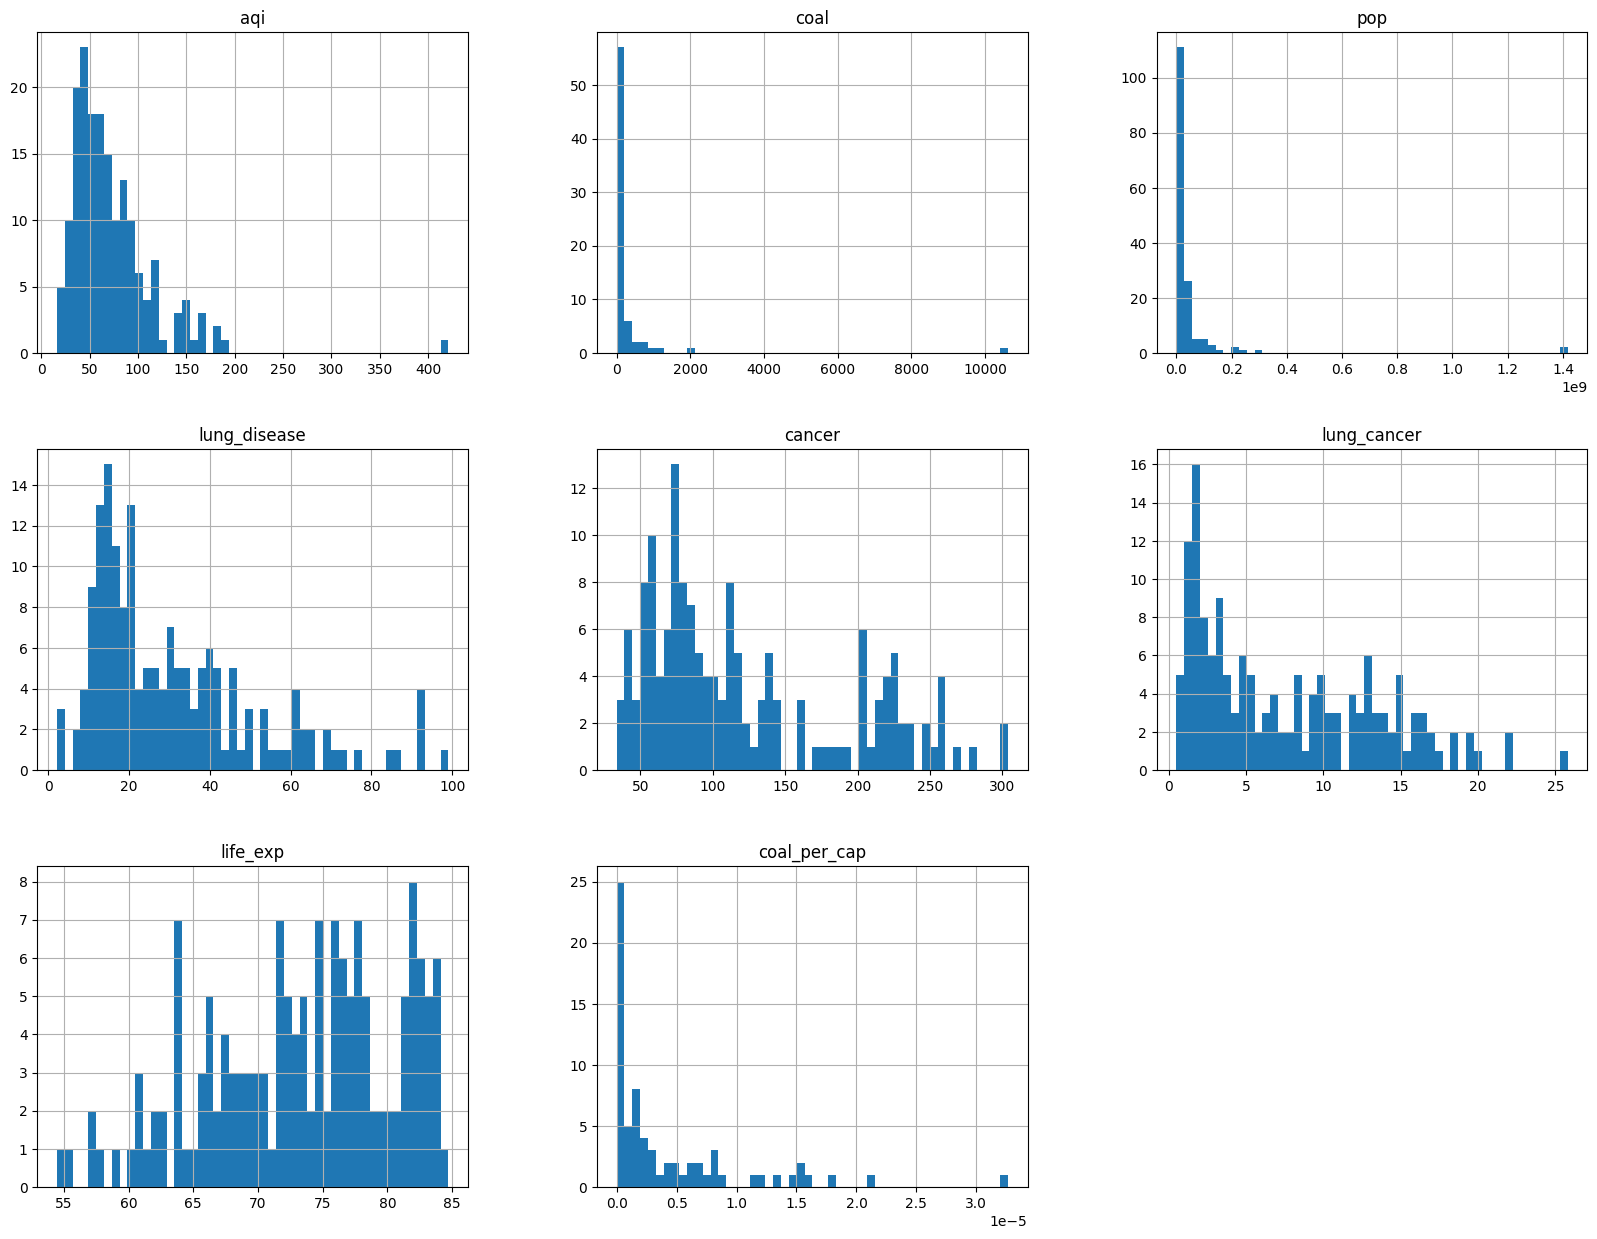

In [9]:
combined.hist(figsize=(20,15), bins=50)

array([[<Axes: xlabel='aqi', ylabel='aqi'>,
        <Axes: xlabel='coal', ylabel='aqi'>,
        <Axes: xlabel='pop', ylabel='aqi'>,
        <Axes: xlabel='lung_disease', ylabel='aqi'>,
        <Axes: xlabel='cancer', ylabel='aqi'>,
        <Axes: xlabel='lung_cancer', ylabel='aqi'>,
        <Axes: xlabel='life_exp', ylabel='aqi'>,
        <Axes: xlabel='coal_per_cap', ylabel='aqi'>],
       [<Axes: xlabel='aqi', ylabel='coal'>,
        <Axes: xlabel='coal', ylabel='coal'>,
        <Axes: xlabel='pop', ylabel='coal'>,
        <Axes: xlabel='lung_disease', ylabel='coal'>,
        <Axes: xlabel='cancer', ylabel='coal'>,
        <Axes: xlabel='lung_cancer', ylabel='coal'>,
        <Axes: xlabel='life_exp', ylabel='coal'>,
        <Axes: xlabel='coal_per_cap', ylabel='coal'>],
       [<Axes: xlabel='aqi', ylabel='pop'>,
        <Axes: xlabel='coal', ylabel='pop'>,
        <Axes: xlabel='pop', ylabel='pop'>,
        <Axes: xlabel='lung_disease', ylabel='pop'>,
        <Axes: xlabel='cancer'

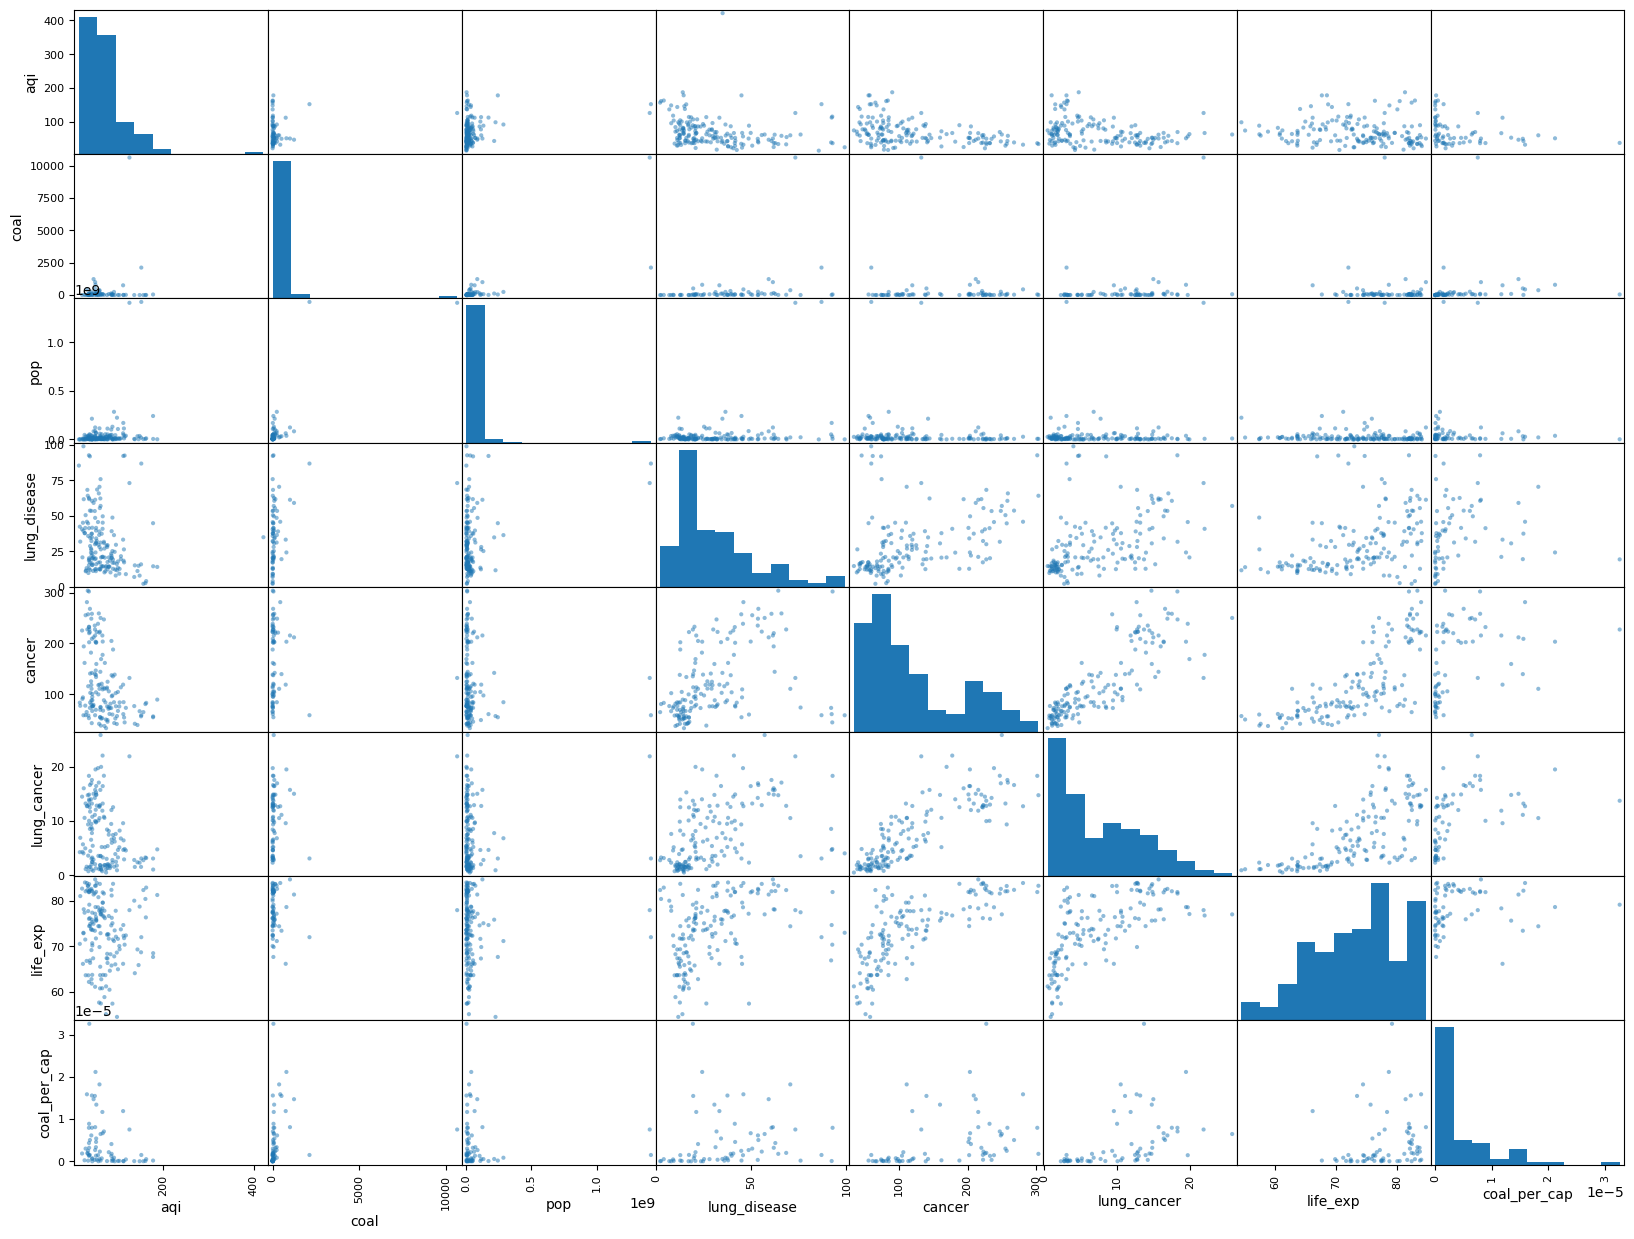

In [10]:
pd.plotting.scatter_matrix(combined, figsize=(20,15))

In [11]:
combined.drop(columns='country').corr()

,aqi,coal,pop,lung_disease,cancer,lung_cancer,life_exp,coal_per_cap
aqi,1.000000,0.198310,0.267238,-0.203072,-0.402405,-0.308502,-0.127500,-0.295396
coal,0.198310,1.000000,0.795023,0.277180,-0.066299,0.256715,-0.033690,0.142922
pop,0.267238,0.795023,1.000000,0.276925,-0.077625,0.072893,-0.006827,-0.037125
lung_disease,-0.203072,0.277180,0.276925,1.000000,0.414976,0.469359,0.386240,0.130038
cancer,-0.402405,-0.066299,-0.077625,0.414976,1.000000,0.834898,0.735662,0.373755
lung_cancer,-0.308502,0.256715,0.072893,0.469359,0.834898,1.000000,0.668252,0.448585
life_exp,-0.127500,-0.033690,-0.006827,0.386240,0.735662,0.668252,1.000000,0.135613
coal_per_cap,-0.295396,0.142922,-0.037125,0.130038,0.373755,0.448585,0.135613,1.000000


## Initial EDA observations
AQI has weak negative correlations with cancer, lung cancer and coal per capita. This means countries with higher AQI have lower cancer rates and coal usage (for electricity) per capita. There is also a weak positive correlation between AQI and population size. A hypothesis for that correlation is that countries with large populations have large cities with worse AQI, but countries can also have large populations spread out over a large landmass. 

Cancer prevalence has a strong positive correlation with life expectancy. This is an established biological phenomenon. "If we lived long enough, sooner or later we all would get cancer" (Dr. Robert A. Weinberg, https://web.archive.org/web/20170624233156/http://www.nytimes.com/2010/12/28/health/28cancer.html).

There is weak to moderate positive correlation between (lung) cancer prevalence and coal usage per capita. This is surprising. As mentioned earlier, countries with higher cancer prevalence have lower AQI. But countries with higher cancer prevalence also have higher coal usage per capita. A hypothesis for this is that more developed countries use more coal per capita but have better AQIs, and their populations live longer and have a higher prevalence of cancer.

Let's see if these patterns hold true for more detailed data in a specific country, the U.S.A.

In [60]:
cty_aqi = pd.read_excel("assets/data/AirPollution/ctyfactbook2023.xlsx", sheet_name='County Factbook 2023', na_values=['IN', 'ND'])
cty_aqi_columns = cty_aqi.iloc[1]
cty_aqi = cty_aqi[2:]
cty_aqi.columns = cty_aqi_columns
cty_aqi.replace('IN', np.nan)
cty_aqi.replace('ND', np.nan)
cty_aqi = cty_aqi.loc[cty_aqi['County FIPS Code'].notnull()]
cty_aqi.columns = ['State', 'County', 'FIPS', 'Pop', 'CO', 'Pb', 'NO2 AM', 'NO2 1-hr', 'O3', 'PM10', 'PM2.5 Wtd AM', 'PM2.5 24-hr', 'SO2']
cty_aqi.to_csv("assets/data/AirPollution/cty_aqi.csv")
cty_aqi = pd.read_csv("assets/data/AirPollution/cty_aqi.csv", index_col=0)
cty_aqi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145 entries, 2 to 1146
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         1145 non-null   object 
 1   County        1145 non-null   object 
 2   FIPS          1145 non-null   int64  
 3   Pop           1145 non-null   int64  
 4   CO            147 non-null    float64
 5   Pb            52 non-null     float64
 6   NO2 AM        238 non-null    float64
 7   NO2 1-hr      211 non-null    float64
 8   O3            763 non-null    float64
 9   PM10          314 non-null    float64
 10  PM2.5 Wtd AM  569 non-null    float64
 11  PM2.5 24-hr   573 non-null    float64
 12  SO2           257 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 125.2+ KB


In [61]:
cty_lung_cancer = pd.read_csv("assets/data/AirPollution/IHME_USA_LUNG_CANCER_COUNTY_RACE_ETHNICITY_2019.CSV")
cty_lung_cancer = cty_lung_cancer.loc[cty_lung_cancer['val'].notnull()]
cty_lung_cancer = cty_lung_cancer.loc[cty_lung_cancer['fips'].notnull()]
cty_lung_cancer['location_name'] = cty_lung_cancer['location_name'].str.replace(r'\(.*\)', '', regex=True)
cty_lung_cancer['fips'] = cty_lung_cancer['fips'].astype(int)
cty_lung_cancer_mean = pd.DataFrame(data=cty_lung_cancer.groupby('fips', as_index=False)['val'].mean())
cty_lung_cancer_mean.columns = ['FIPS', 'Lung cancer rate']
cty_lung_cancer_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIPS              3178 non-null   int64  
 1   Lung cancer rate  3178 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.8 KB


In [64]:
cty_aqi_lung_cancer = pd.merge(cty_aqi, cty_lung_cancer_mean, on='FIPS', how='inner')

In [65]:
cty_aqi_lung_cancer.head(5)

,State,County,FIPS,Pop,CO,Pb,NO2 AM,NO2 1-hr,O3,PM10,PM2.5 Wtd AM,PM2.5 24-hr,SO2,Lung cancer rate
0,Alabama,Baldwin County,1003,182265,NaN,NaN,NaN,NaN,0.065,NaN,7.6,18.0,NaN,0.000648
1,Alabama,Clay County,1027,13932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001062
2,Alabama,Colbert County,1033,54428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000843
3,Alabama,DeKalb County,1049,71109,NaN,NaN,NaN,NaN,0.066,NaN,8.9,21.0,NaN,0.000841
4,Alabama,Elmore County,1051,79303,NaN,NaN,NaN,NaN,0.061,NaN,NaN,NaN,NaN,0.000854


In [73]:
cty_aqi_lung_cancer = cty_aqi_lung_cancer.drop(columns=['State', 'County'])

In [74]:
cty_aqi_lung_cancer.describe()

,FIPS,Pop,CO,Pb,NO2 AM,NO2 1-hr,O3,PM10,PM2.5 Wtd AM,PM2.5 24-hr,SO2,Lung cancer rate
count,1129.000000,1.129000e+03,145.000000,51.000000,238.000000,211.000000,760.000000,310.000000,566.000000,570.000000,255.000000,1129.000000
mean,30102.903454,2.269259e+05,1.255172,0.054706,7.386555,34.473934,0.068370,98.319355,8.369611,26.452632,17.737255,0.000744
std,15699.591584,4.948395e+05,0.684950,0.084175,5.119021,14.478984,0.007716,115.202444,1.925533,11.201558,40.485897,0.000190
min,1003.000000,9.680000e+02,0.000000,0.000000,1.000000,3.000000,0.037000,17.000000,2.200000,6.000000,0.000000,0.000233
25%,18003.000000,3.316500e+04,1.000000,0.010000,3.000000,25.000000,0.064000,48.000000,7.500000,21.000000,3.000000,0.000616
50%,30049.000000,8.784100e+04,1.000000,0.020000,6.000000,36.000000,0.068000,71.500000,8.500000,25.000000,5.000000,0.000721
75%,42073.000000,2.158880e+05,1.000000,0.055000,10.000000,44.000000,0.073000,110.500000,9.600000,30.000000,15.000000,0.000848
max,56045.000000,9.818605e+06,5.000000,0.460000,27.000000,102.000000,0.107000,1495.000000,14.700000,148.000000,473.000000,0.001840


array([[<Axes: title={'center': 'FIPS'}>,
        <Axes: title={'center': 'Pop'}>, <Axes: title={'center': 'CO'}>],
       [<Axes: title={'center': 'Pb'}>,
        <Axes: title={'center': 'NO2 AM'}>,
        <Axes: title={'center': 'NO2 1-hr'}>],
       [<Axes: title={'center': 'O3'}>, <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'PM2.5 Wtd AM'}>],
       [<Axes: title={'center': 'PM2.5 24-hr'}>,
        <Axes: title={'center': 'SO2'}>,
        <Axes: title={'center': 'Lung cancer rate'}>]], dtype=object)

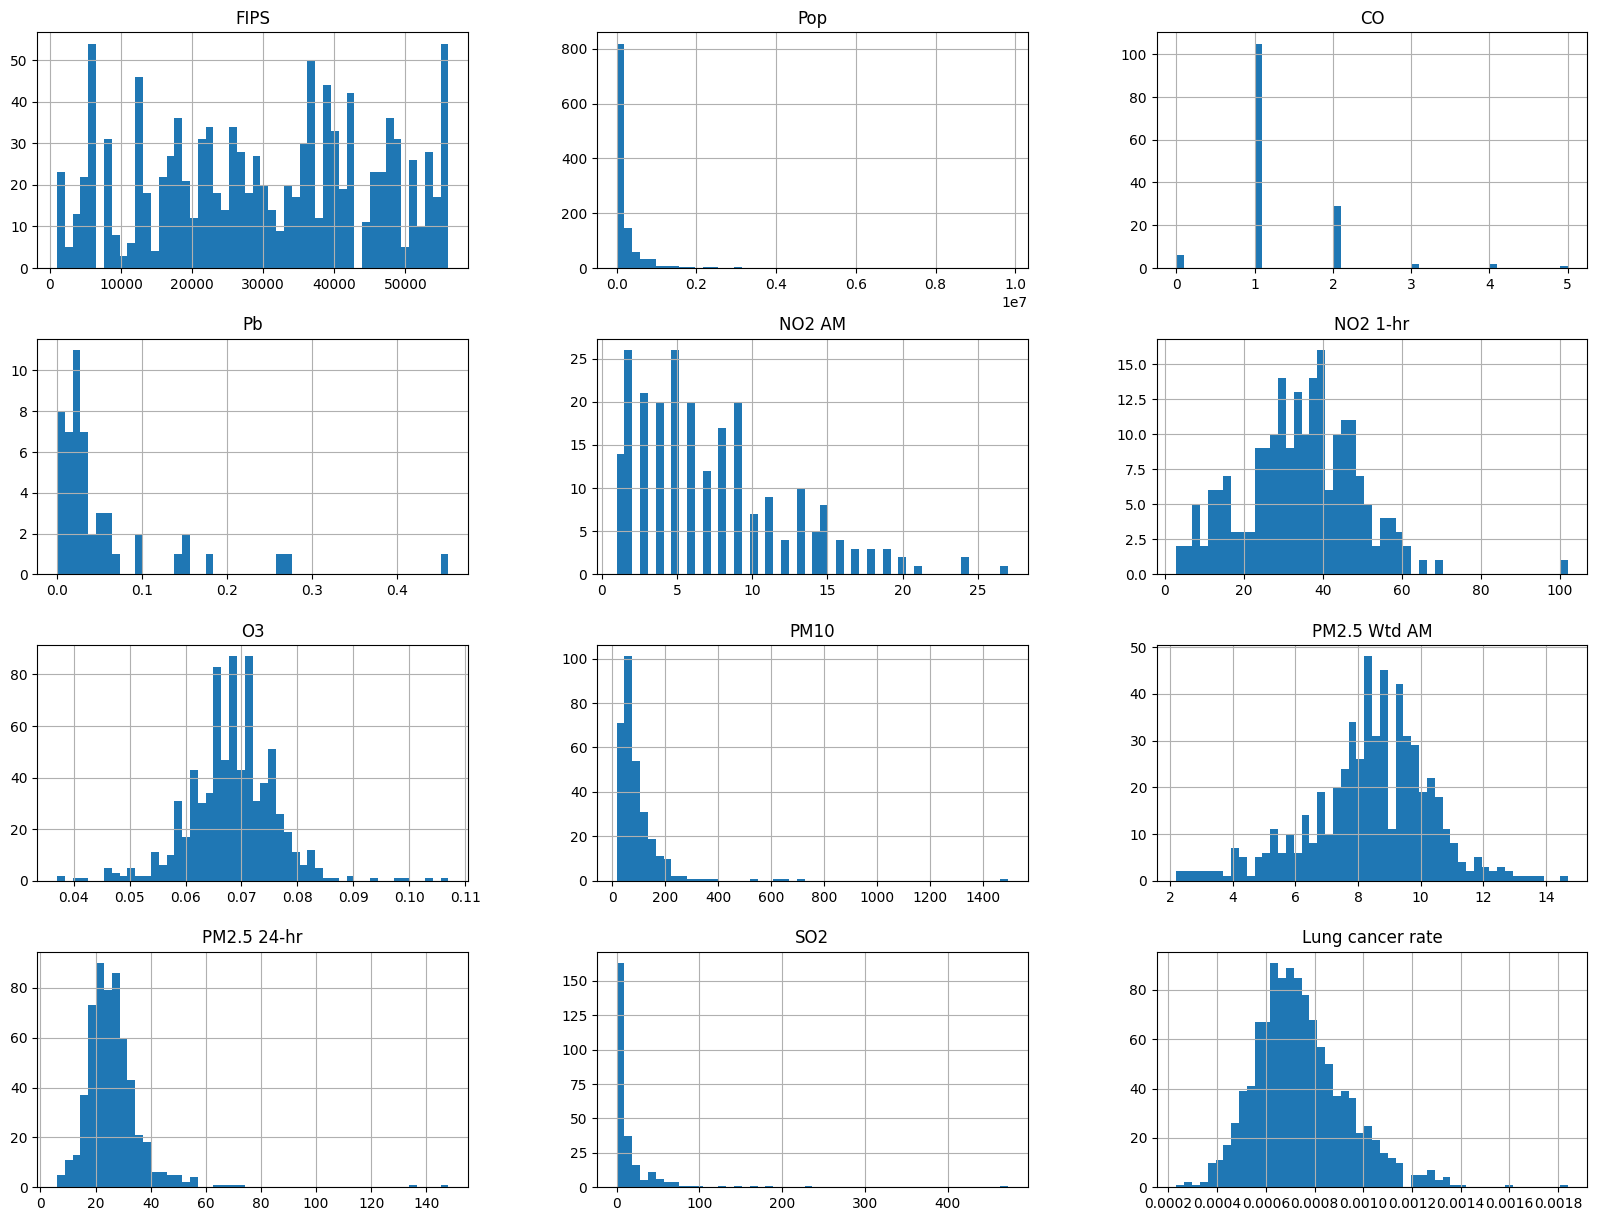

In [75]:
cty_aqi_lung_cancer.hist(figsize=(20,15), bins=50)

array([[<Axes: xlabel='FIPS', ylabel='FIPS'>,
        <Axes: xlabel='Pop', ylabel='FIPS'>,
        <Axes: xlabel='CO', ylabel='FIPS'>,
        <Axes: xlabel='Pb', ylabel='FIPS'>,
        <Axes: xlabel='NO2 AM', ylabel='FIPS'>,
        <Axes: xlabel='NO2 1-hr', ylabel='FIPS'>,
        <Axes: xlabel='O3', ylabel='FIPS'>,
        <Axes: xlabel='PM10', ylabel='FIPS'>,
        <Axes: xlabel='PM2.5 Wtd AM', ylabel='FIPS'>,
        <Axes: xlabel='PM2.5 24-hr', ylabel='FIPS'>,
        <Axes: xlabel='SO2', ylabel='FIPS'>,
        <Axes: xlabel='Lung cancer rate', ylabel='FIPS'>],
       [<Axes: xlabel='FIPS', ylabel='Pop'>,
        <Axes: xlabel='Pop', ylabel='Pop'>,
        <Axes: xlabel='CO', ylabel='Pop'>,
        <Axes: xlabel='Pb', ylabel='Pop'>,
        <Axes: xlabel='NO2 AM', ylabel='Pop'>,
        <Axes: xlabel='NO2 1-hr', ylabel='Pop'>,
        <Axes: xlabel='O3', ylabel='Pop'>,
        <Axes: xlabel='PM10', ylabel='Pop'>,
        <Axes: xlabel='PM2.5 Wtd AM', ylabel='Pop'>,
        <A

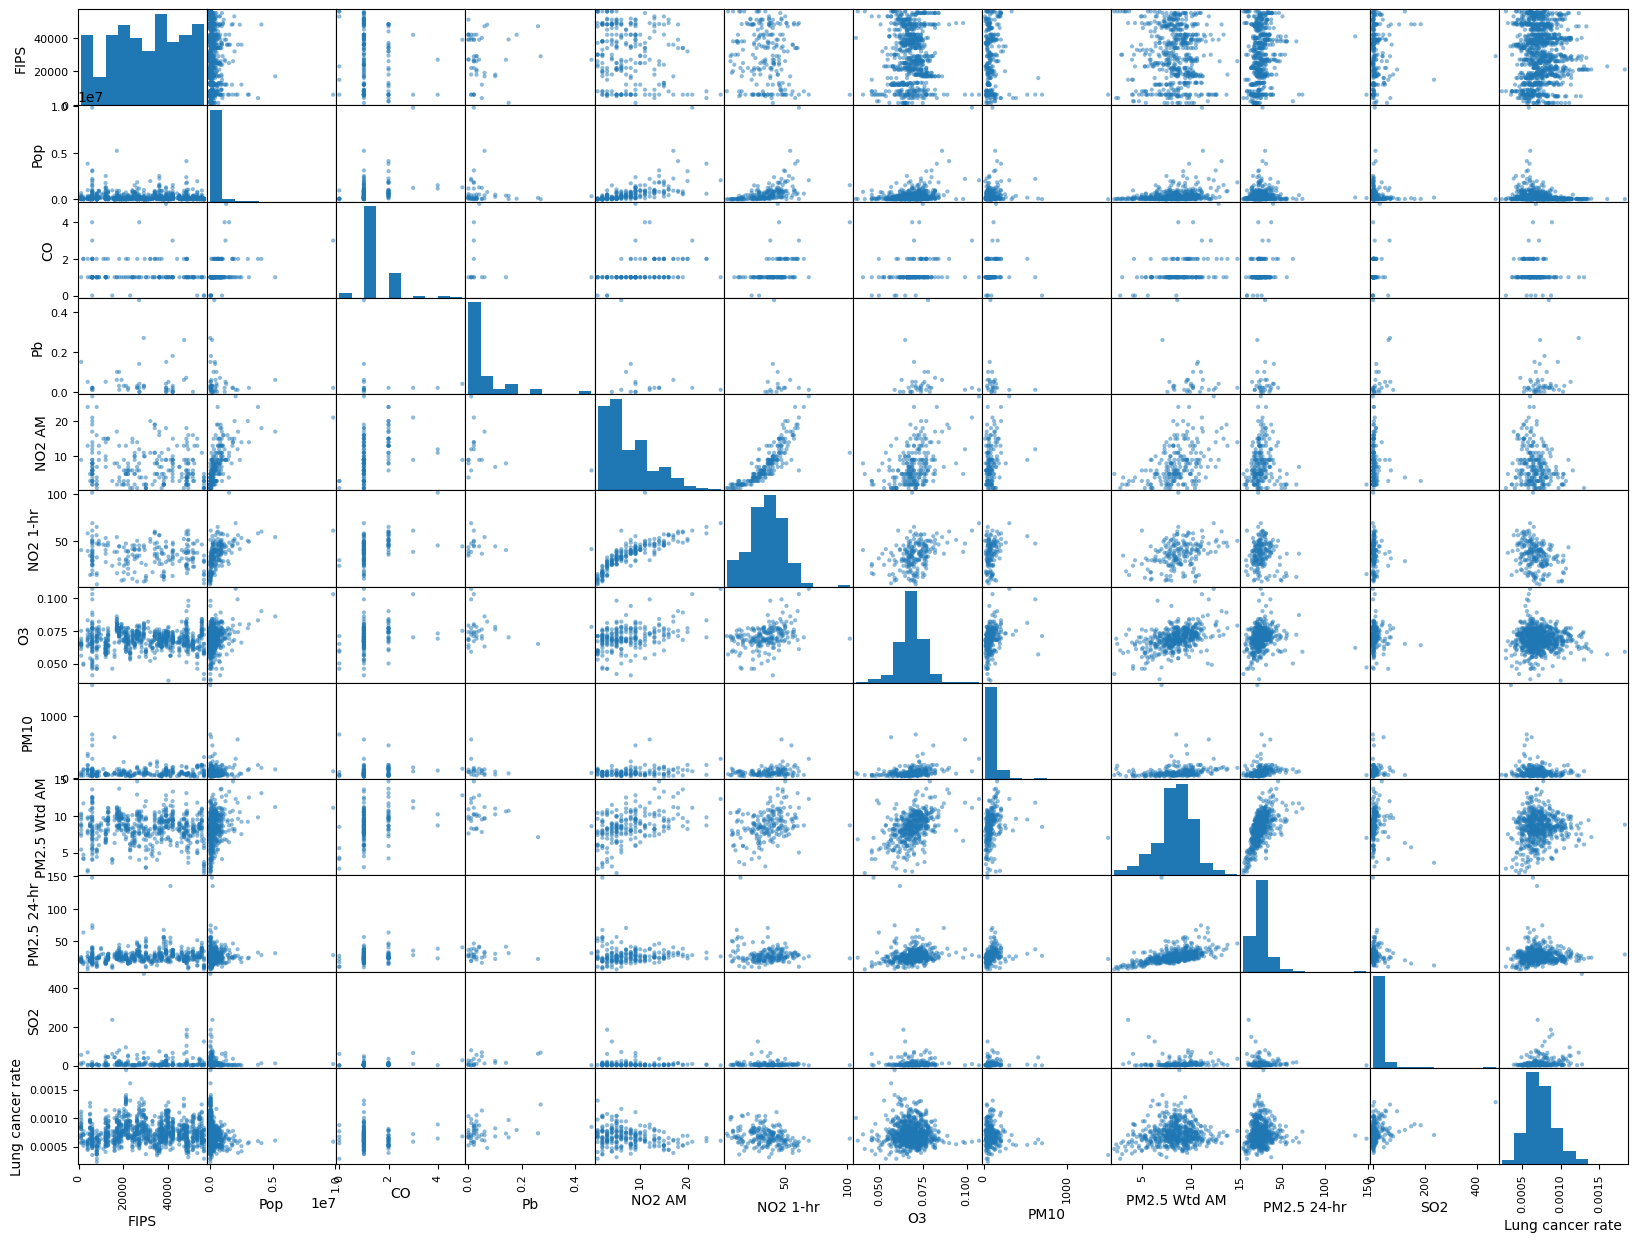

In [76]:
pd.plotting.scatter_matrix(cty_aqi_lung_cancer, figsize=(20,15))

In [77]:
cty_aqi_lung_cancer.corr()

,FIPS,Pop,CO,Pb,NO2 AM,NO2 1-hr,O3,PM10,PM2.5 Wtd AM,PM2.5 24-hr,SO2,Lung cancer rate
FIPS,1.000000,-0.092662,-0.101124,0.021357,-0.190190,-0.124936,0.008238,-0.070124,-0.051318,0.085360,0.027268,0.024518
Pop,-0.092662,1.000000,0.331797,-0.111961,0.616920,0.489311,0.317326,0.052524,0.254185,0.015137,-0.104129,-0.226272
CO,-0.101124,0.331797,1.000000,-0.169106,0.360882,0.462359,0.264605,0.053169,0.377614,0.254532,0.189964,-0.043760
Pb,0.021357,-0.111961,-0.169106,1.000000,-0.267475,-0.129702,-0.031981,-0.180949,-0.242383,-0.001553,0.165299,0.237656
NO2 AM,-0.190190,0.616920,0.360882,-0.267475,1.000000,0.835948,0.420088,0.248598,0.456895,-0.011194,-0.134275,-0.234051
NO2 1-hr,-0.124936,0.489311,0.462359,-0.129702,0.835948,1.000000,0.384180,0.275329,0.343549,-0.131624,-0.072811,-0.304517
O3,0.008238,0.317326,0.264605,-0.031981,0.420088,0.384180,1.000000,0.313214,0.467687,0.093620,-0.037807,-0.037228
PM10,-0.070124,0.052524,0.053169,-0.180949,0.248598,0.275329,0.313214,1.000000,0.148143,0.096960,0.058920,-0.140778
PM2.5 Wtd AM,-0.051318,0.254185,0.377614,-0.242383,0.456895,0.343549,0.467687,0.148143,1.000000,0.509061,-0.131140,0.103759
PM2.5 24-hr,0.085360,0.015137,0.254532,-0.001553,-0.011194,-0.131624,0.093620,0.096960,0.509061,1.000000,-0.110516,0.027197


## More EDA observations

Again, there are relatively weak correlations between lung cancer rates and the features. Lung cancer has weak positive correlations with Pb and SO2 AQI features, but weak negative correlations with NO2 (AM and 1-hr). Looking up above at the scatter matrix row for lung cancer rate, the NO2 AM and 1-hr data are grouped closely together, but don't show a clear trend.

A regression model can be trained on these features and tested to see how well the features predict lung cancer rates. 

## Building a regression model

In [142]:
aqi_lung_cancer = cty_aqi_lung_cancer.drop(columns=['FIPS', 'Pop', 'CO', 'O3', 'PM2.5 Wtd AM', 'PM2.5 24-hr'])

In [143]:
train_set, test_set = train_test_split(aqi_lung_cancer, test_size=0.2, random_state=42)

In [144]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 903 entries, 490 to 1126
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pb                36 non-null     float64
 1   NO2 AM            196 non-null    float64
 2   NO2 1-hr          174 non-null    float64
 3   PM10              242 non-null    float64
 4   SO2               198 non-null    float64
 5   Lung cancer rate  903 non-null    float64
dtypes: float64(6)
memory usage: 49.4 KB


In [145]:
aqi_X = train_set.drop(columns='Lung cancer rate')
aqi_y = train_set['Lung cancer rate']

In [146]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler())
])

In [147]:
aqi_X_prep = pipeline.fit_transform(aqi_X)

In [148]:
aqi_X_prep[:5]

array([[-0.06976483, -0.12879305,  0.02198428, -0.14671054, -0.17256975],
       [-0.06976483, -0.12879305,  0.02198428, -0.14671054, -0.17256975],
       [-0.06976483, -0.12879305,  0.02198428, -0.14671054, -0.17256975],
       [-0.06976483, -0.12879305,  0.02198428, -0.14671054, -0.17256975],
       [-0.06976483, -0.12879305,  0.02198428, -0.14671054, -0.17256975]])

In [149]:
aqi_X_prep = pd.DataFrame(aqi_X_prep, columns=aqi_X.columns, index=aqi_X.index)

In [150]:
aqi_X_prep.head(5)

,Pb,NO2 AM,NO2 1-hr,PM10,SO2
490,-0.069765,-0.128793,0.021984,-0.146711,-0.17257
394,-0.069765,-0.128793,0.021984,-0.146711,-0.17257
596,-0.069765,-0.128793,0.021984,-0.146711,-0.17257
887,-0.069765,-0.128793,0.021984,-0.146711,-0.17257
1103,-0.069765,-0.128793,0.021984,-0.146711,-0.17257


In [151]:
lin_reg = LinearRegression()
lin_reg.fit(aqi_X_prep, aqi_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [152]:
predictions = lin_reg.predict(aqi_X_prep)
lin_rmse = root_mean_squared_error(aqi_y, predictions)
lin_rmse

0.00018720820629216357

In [153]:
test_X = test_set.drop(columns='Lung cancer rate')
test_y = test_set['Lung cancer rate']
test_X_prep = pipeline.fit_transform(test_X)
test_X_prep = pd.DataFrame(test_X_prep, columns=test_X.columns, index=test_X.index)
test_X_prep.head(5)

,Pb,NO2 AM,NO2 1-hr,PM10,SO2
743,-0.079521,-0.091538,0.067520,-0.094996,1.266321
1010,-0.079521,-0.091538,0.067520,-0.094996,-0.124745
1123,-0.079521,-0.091538,0.067520,-0.242603,-0.124745
140,-0.079521,-0.091538,0.067520,-0.094996,-0.124745
554,-0.079521,1.531024,0.576169,0.775375,0.184381


In [154]:
test_predictions = lin_reg.predict(test_X_prep)
test_lin_rmse = root_mean_squared_error(test_y, test_predictions)
test_lin_rmse

0.0001852790612216593

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->
- https://www.geeksforgeeks.org/pandas/pandas-join-dataframes/
- https://superuser.com/questions/1161039/how-do-i-join-two-tables-with-libreoffice-calc#1161118
- https://www.libreofficehelp.com/vlookup-libreoffice-calc/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
- https://www.statology.org/what-is-a-strong-correlation/
- https://stackoverflow.com/questions/31328861/replacing-header-with-top-row#31328974
- https://www.geeksforgeeks.org/python/how-to-display-notnull-rows-and-columns-in-a-python-dataframe/
- https://www.kodeclik.com/remove-parantheses-from-string-in-python/

In [2]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 1271 bytes to source.py
